In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [62]:
#required funstions

def matchwise_batsman_totalruns(df):

    #get total runs scored by batsman per match
    match_batsman_runs = df.groupby(['match_id', 'batsman'])['batsman_runs'].sum().reset_index()
    
    return match_batsman_runs

def matchwise_batsman_boundaries(df):
    
    #filter rows where only boundaries were scored
    df_boundaries = df[df.batsman_runs.isin([4,6])]

    #get total boundaries scored by batsman per match
    match_batsman_boundaries = df_boundaries.groupby(['match_id', 'batsman'])['batsman_runs'].agg(['sum','count']).reset_index()
    match_batsman_boundaries = match_batsman_boundaries.rename(columns={'sum':'total_boundary_runs', 'count':'boundary_count'})
    
    return match_batsman_boundaries

def matchwise_batsman_get4(df):
    
    #filter rows where only boundaries were scored
    df_boundaries = df[df.batsman_runs.isin([4])]

    #get total boundaries scored by batsman per match
    match_batsman_boundaries4 = df_boundaries.groupby(['match_id', 'batsman'])['batsman_runs'].agg(['sum','count']).reset_index()
    match_batsman_boundaries4 = match_batsman_boundaries4.rename(columns={'sum':'total_boundary_4s', 'count':'boundary_4_count'})
    
    return match_batsman_boundaries4

def matchwise_batsman_get6(df):
    
    #filter rows where only boundaries were scored
    df_boundaries = df[df.batsman_runs.isin([6])]

    #get total boundaries scored by batsman per match
    match_batsman_boundaries6 = df_boundaries.groupby(['match_id', 'batsman'])['batsman_runs'].agg(['sum','count']).reset_index()
    match_batsman_boundaries6 = match_batsman_boundaries6.rename(columns={'sum':'total_boundary_6s', 'count':'boundary_6_count'})
    
    return match_batsman_boundaries6

def matchwise_batsman_scored123(df):
    
    #filter rows where only boundaries were scored
    df_boundaries = df[df.batsman_runs.isin([1,2,3])]

    #get total boundaries scored by batsman per match
    match_batsman_boundaries = df_boundaries.groupby(['match_id', 'batsman'])['batsman_runs'].agg(['sum','count']).reset_index()
    match_batsman_boundaries = match_batsman_boundaries.rename(columns={'sum':'total_scored123_runs', 'count':'scored123_count'})
    
    return match_batsman_boundaries

def matchwise_batsman_ballsplayed(df):
    
    match_batsman_balls = df.groupby(['match_id', 'batsman'])['ball'].count().reset_index()
    
    return match_batsman_balls

def matchwise_batsman_strikerate(df):
    
    df_strike_rate = matchwise_batsman_totalruns(df).merge(matchwise_batsman_ballsplayed(df), on =['match_id','batsman'])
    df_strike_rate['strike_rate'] = np.round(df_strike_rate['batsman_runs']/df_strike_rate['ball']*100,3)
    return df_strike_rate

def matchwise_bowler_totalballs(df):

    bowler_totalballs = df.groupby(['match_id', 'bowler'])['ball'].count().reset_index()
    bowler_totalballs = bowler_totalballs.rename(columns={'ball':'total_balls'})
    return bowler_totalballs
    

def matchwise_bowler_totovers(df):    
    
    match_bowler_totovers = df.groupby(['match_id', 'bowler'])['over'].nunique().reset_index()
    
    return match_bowler_totovers

def matchwise_bowler_gaveruns(df):
    
    match_bowler_gaveruns = df.groupby(['match_id', 'bowler'])['total_runs'].sum().reset_index()
    
    return match_bowler_gaveruns

def matchwise_bowler_gaveboundaries(df):
    
    df = df[df.batsman_runs.isin([4,6])]
    
    match_bowler_gaveboundaries = df.groupby(['match_id', 'bowler'])['total_runs'].count().reset_index()
    match_bowler_gaveboundaries = match_bowler_gaveboundaries.rename(columns={'total_runs':'boundary_counts'})
    return match_bowler_gaveboundaries

def matchwise_bowler_gave6(df):
    
    df = df[df.batsman_runs.isin([6])]
    
    match_bowler_gave6 = df.groupby(['match_id', 'bowler'])['total_runs'].count().reset_index()
    match_bowler_gave6 = match_bowler_gave6.rename(columns={'total_runs':'total6_counts'})
    return match_bowler_gave6
    
    
def economy_rate(df):

    match_bowler_economyrate =  matchwise_bowler_gaveruns(df).merge(matchwise_bowler_totovers(df), on=['match_id', 'bowler'])
    match_bowler_economyrate['economy_rate'] = match_bowler_economyrate['total_runs']/match_bowler_economyrate['over']
    
    
    return match_bowler_economyrate


def count_balls_toscore(df, score):
    """
    takes dataframe and scores needed by user abd returns array of balls taken to reach score every match
    """
    
    #counting total runs scored per ball
    df['total_runs_cumsum'] = df.groupby('match_id')['total_runs'].cumsum().values
    
    balls_taken = []
    

    #counting balls taken to score 50 runs by kkr team
    for m in df['match_id'].unique():
        df1 = df[df.match_id==m]

        if df1.total_runs_cumsum.isin(range(score,score+5)).any():
            df2 = df1[df1.total_runs_cumsum<=score]
            balls_taken.append(df2.shape[0])
            
        else:
            balls_taken.append(0)
            
    result = pd.DataFrame({'match_id' : df['match_id'].unique().tolist(), 
                          'balls_taken': balls_taken})
            
    return result
    


In [3]:
def matchwise_wickets_total(df):
    
    """
    takes filtered dataframe as input and returns matchwise wickets taken
    """
    
    wickets = df[df.player_dismissed.notnull()]
    
    #get wicket count matchwise
    wickets_count = wickets.groupby('match_id')['player_dismissed'].count().reset_index()
    wickets_count = wickets_count.rename(columns={'player_dismissed':'wicket_count'})

    return wickets_count
    

In [4]:
def get_dot_balls(df):
    """
    take data frame for total team matches and returns dot balls bowled by each bowler per match
    """

    #counting number of dot balls i,e where no wicket is taken neither runs are taken

    #total balls bowled by the bowler
    df_tot_balls = df.groupby(['match_id', 'bowler'])['total_runs'].count().reset_index()
    df_tot_balls = df_tot_balls.rename(columns={'total_runs': 'total_balls'})

    #total dots bowled by the bowler
    df_dots = df[(df.total_runs==0)|(df.player_dismissed==np.nan)]
    df_tot_dots = df_dots.groupby(['match_id', 'bowler'])['total_runs'].count().reset_index()
    df_tot_dots = df_tot_dots.rename(columns={'total_runs': 'total_dots'})

    df_dots_all = df_tot_balls.merge(df_tot_dots, how='left', on=['match_id', 'bowler'])
    
    return df_dots_all

In [160]:
# import data 
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")
matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [165]:
#delhi's team was earlier know as Delhi Daredevils, lets make the required changes
deliveries = deliveries.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches = matches.replace('Deccan Chargers', 'Sunrisers Hyderabad')

## 1. Who will win the match srh or rcb?

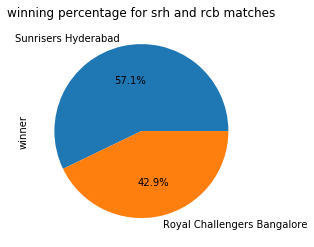

In [150]:
#get matches between srh and rcb
srh_rcb_matches = matches[((matches.team1=='Sunrisers Hyderabad')&(matches.team2=='Royal Challengers Bangalore'))|((matches.team2=='Sunrisers Hyderabad')&(matches.team1=='Royal Challengers Bangalore'))]

#getting wins count
srh_rcb_matches.winner.value_counts().plot(kind='pie', autopct='%1.1f%%', title="winning percentage for srh and rcb matches")

In [166]:
# matches[(matches.team1=='Sunrisers Hyderabad')|(matches.team2=='Sunrisers Hyderabad')].season.unique()
matches[(matches.team1=='Sunrisers Hyderabad')|(matches.team2=='Sunrisers Hyderabad')].season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

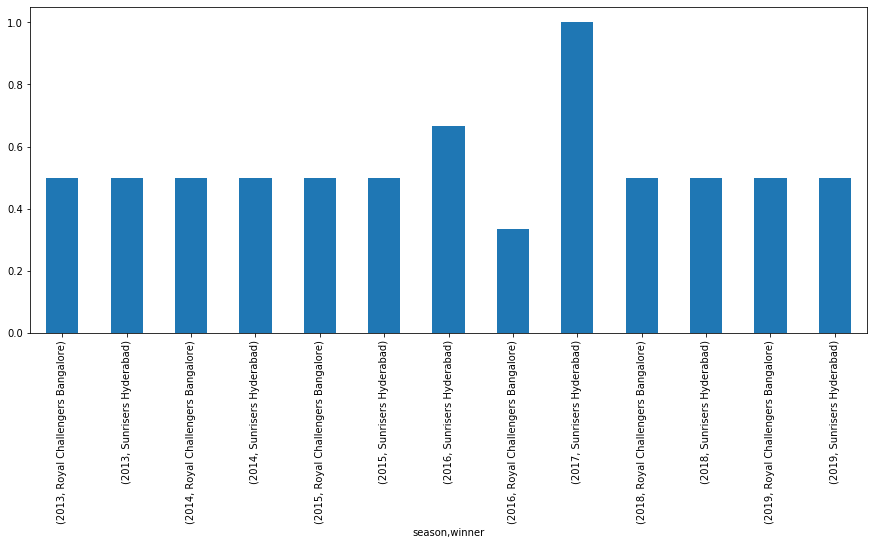

In [167]:
#getting matches between srh nad rcb matchwise
srh_rcb_matches.groupby('season')['winner'].value_counts(normalize=True).plot(kind='bar', figsize=(15,6))

In [168]:
def get_season_winpercent(team_name):
    """
    takes team name as input and returns season wise winning percent
    """

    #count matches played by srh
    get_matches = matches[(matches.team1==team_name)|(matches.team2==team_name)]

    #getting matches played by team per season
    matches_played = get_matches.groupby('season')['id'].count().reset_index()
    matches_played = matches_played.rename(columns={'id': 'tot_matches_played' })

    #getting matches won by team per season
    matches_won = matches[matches.winner==team_name].groupby('season')['id'].count().reset_index()
    matches_won = matches_won.rename(columns={'id': 'tot_matches_won' })

    matches_wins = matches_played.merge(matches_won, on='season')
    matches_wins['winning_percent'] = matches_wins.tot_matches_won/matches_wins.tot_matches_played*100
    return matches_wins[['season', 'winning_percent']]

In [169]:
#get winning percent of srh per season
srh_winp = get_season_winpercent('Sunrisers Hyderabad')

#get winning percent of rcb per season
rcb_winp = get_season_winpercent('Royal Challengers Bangalore')


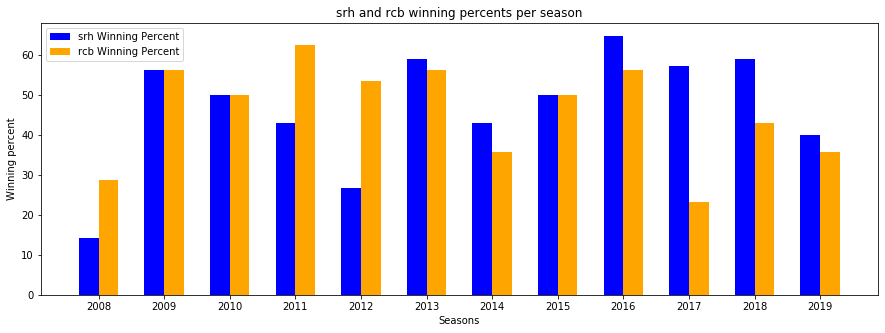

In [170]:
#checking visually
width=0.30
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(srh_winp.season-width/2, srh_winp.winning_percent, width , color='b', label='srh Winning Percent')
ax.bar(rcb_winp.season+width/2, rcb_winp.winning_percent, width,  color='orange', label='rcb Winning Percent')
plt.xlabel("Seasons")
plt.ylabel("Winning percent")
plt.title("srh and rcb winning percents per season")
plt.xticks(np.arange(2008,2020))
plt.legend()
plt.show()

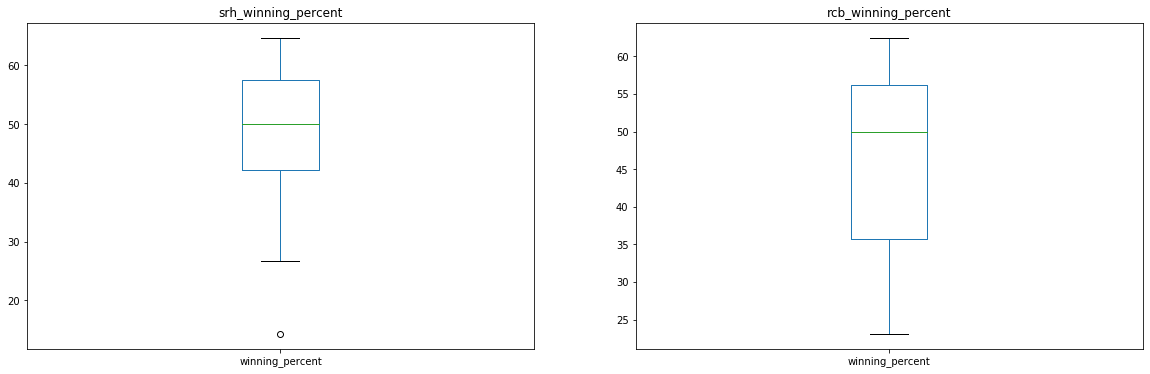

In [171]:
#checking visually
fig, ax = plt.subplots(1,2, figsize=(20,6))
srh_winp.winning_percent.plot('box', ax=ax[0], title='srh_winning_percent')
rcb_winp.winning_percent.plot('box', ax=ax[1], title='rcb_winning_percent')
# plt.yticks(ticks=[0,5,10,15,20,25,30,35,40,45,50,55,60,65]);

**Inference:**
    If we check season wise stats rcb seemse to have a higher winning percent overall, and even if we check season wise winning percent rcb seems to have higher winning percent.

## 2. How many wickets totally will both the teams lose during the powerplay?

    * 0-1
    * 2-3
    * 4
    * 5 or more

In [29]:
#get all matches between srh and rcb
srh_rcb_all = deliveries[((deliveries.bowling_team=='Sunrisers Hyderabad')&(deliveries.batting_team=='Royal Challengers Bangalore'))|((deliveries.bowling_team=='Royal Challengers Bangalore')&(deliveries.batting_team=='Sunrisers Hyderabad'))]

In [33]:
# getting rows of powerplay foe rach match
srh_rcb_powerplay = srh_rcb_all[srh_rcb_all.over.isin(range(1,7))]

# get total wicketrs by both teams 
srh_rcb_powerplay_wickets = matchwise_wickets_total(srh_rcb_powerplay)

# checking basic wicket_count stat
srh_rcb_powerplay_wickets['wicket_count'].describe()

count    23.000000
mean      3.260870
std       1.572993
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       7.000000
Name: wicket_count, dtype: float64

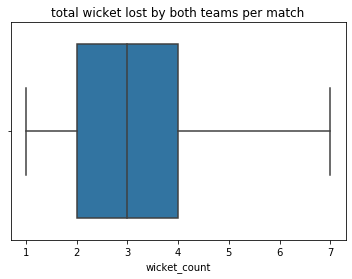

In [51]:
plt.title("total wicket lost by both teams per match")
sns.boxplot(srh_rcb_powerplay_wickets.wicket_count)
# plt.xlabel(orient=90)
plt.show()

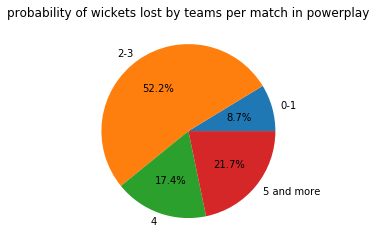

In [141]:
d = {'0-1': np.sum(srh_rcb_powerplay_wickets.wicket_count.isin(range(0,2))),
'2-3': np.sum(srh_rcb_powerplay_wickets.wicket_count.isin(range(2,4))),
'4': np.sum(srh_rcb_powerplay_wickets.wicket_count.isin([4])),
'5 and more': np.sum(srh_rcb_powerplay_wickets.wicket_count>=5)
}

plt.pie(d.values(), autopct='%1.1f%%', labels=d.keys());
plt.title("probability of wickets lost by teams per match in powerplay");
plt.show()

**Inference:**
    If we check on average teams will loose 3 wickets on average also if we check probability we have 52.2% odds indicating 2-3 wickets during powerplay will be lost

## 3. How many bowlers will have economy rate less than 9 and fewer than 6 boundaries of which at most 2 of them only are 6s. Consider only those bowlers who bowl more than 1 over. If no bowler has such stats, the first option will be considered as answer.

    * 0-2
    * 3-4
    * 5-6
    * 7 and more

In [76]:
# getting economy rates for all bowlers per match
srh_rcb_economyrate = economy_rate(srh_rcb_all)

# filter only bowlers who bowl more than 1 over
bowler_o1 = srh_rcb_economyrate[srh_rcb_economyrate.over>1]

In [ ]:
# getting boundary counts for all bowlers per match
srh_rcb_boundary_count = matchwise_bowler_gaveboundaries(srh_rcb_all)

# filter bowlers who gave less than 6 boundaries
bowler_max6_boundary = srh_rcb_boundary_count[srh_rcb_boundary_count['boundary_counts']<6]


In [ ]:
# getting all 6s scored by each bowler
srh_rcb_total6_count = matchwise_bowler_gave6(srh_rcb_all)

# filter only rows where max 2 6s are given by bowler
bowler_max2_6runs = srh_rcb_total6_count[srh_rcb_total6_count['total6_counts']<=2]


In [80]:
# merging the columns as per all 3 conditions given
bowler_conditions_met = bowler_o1.merge(bowler_max6_boundary, on=['match_id', 'bowler']).merge(bowler_max2_6runs, on=['match_id', 'bowler'])

# count number of bowlers per match
bowler_conditions_count = bowler_conditions_met.groupby('match_id')['bowler'].count()

# checking basic stats
bowler_conditions_count.describe()

count    24.000000
mean      4.541667
std       1.999547
min       2.000000
25%       3.000000
50%       4.000000
75%       5.250000
max       9.000000
Name: bowler, dtype: float64

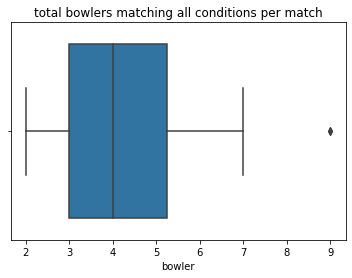

In [85]:
plt.title("total bowlers matching all conditions per match")
sns.boxplot(bowler_conditions_count)
plt.show()

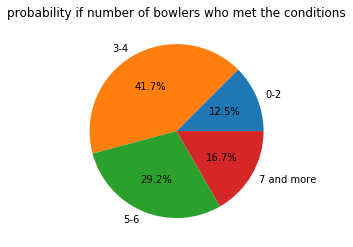

In [119]:
d = {'0-2': np.sum(bowler_conditions_count.isin(range(0,3))),
'3-4': np.sum(bowler_conditions_count.isin(range(3,5))),
'5-6': np.sum(bowler_conditions_count.isin(range(5,7))),
'7 and more': np.sum(bowler_conditions_count>=7)
}

plt.pie(d.values(), autopct='%1.1f%%', labels=d.keys());
plt.title("probability if number of bowlers who met the conditions");
plt.show()

**Inference:**
    We can see maximum chances is to have 3-4 such bowlers however probability is close for having 304 such bowlers as well. Also if we check average is 4 across all matches so we can go with option 3-4 

## 4. How many batsman in the match will score more than 30 runs? If no batsman score more than 30 runs go with option 1?

In [125]:
# getting number of batsman who score more than 30 runs
batsman_totalruns = matchwise_batsman_totalruns(srh_rcb_all)

# filtering batsman who scored more than 30 runs
batsman_totalruns_30more = batsman_totalruns[batsman_totalruns['batsman_runs']>30]

# counting total batsman per match
batsman_30moreruns_count = batsman_totalruns_30more.groupby('match_id')['batsman'].count()

#checking basic stats
batsman_30moreruns_count.describe()

count    24.000000
mean      3.500000
std       1.251086
min       1.000000
25%       2.000000
50%       4.000000
75%       4.250000
max       5.000000
Name: batsman, dtype: float64

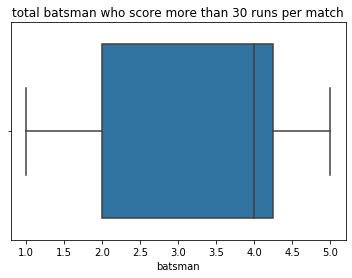

In [127]:
plt.title("total batsman who score more than 30 runs per match")
sns.boxplot(batsman_30moreruns_count)
plt.show()

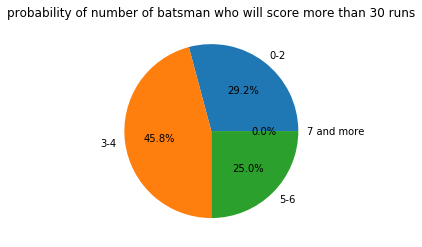

In [128]:
d = {'0-2': np.sum(batsman_30moreruns_count.isin(range(0,3))),
'3-4': np.sum(batsman_30moreruns_count.isin(range(3,5))),
'5-6': np.sum(batsman_30moreruns_count.isin(range(5,7))),
'7 and more': np.sum(batsman_30moreruns_count>=7)
}

plt.pie(d.values(), autopct='%1.1f%%', labels=d.keys());
plt.title("probability of number of batsman who will score more than 30 runs");
plt.show()

**Inference:**
    If we check basic average says 3.5 i.e there are 3-4 batsmen scoring more than 30 per match however with deviations the count may vary . also if we check the probability 45.8% odds of getting 3-4 batsman per match.

## 5. What will be Jasprit Bumrah's Economy Rate in the Death? If he doesnt bowl in the death the first option will considered as the answer.


In [134]:
# getting rows for only death overs i.e 16-20 overs
srh_rcb_deathovers = srh_rcb_all[srh_rcb_all.over.isin(range(16,21))]

# getting economy rate of bowlers per match
srh_rcb_death_econrate = economy_rate(srh_rcb_deathovers)

# checking Bumrah's name in each match
bumrah_death_econrate = srh_rcb_death_econrate[srh_rcb_death_econrate.bowler=='JJ Bumrah']
bumrah_death_econrate['economy_rate'].describe()

count    10.000000
mean      9.566667
std       4.053805
min       3.000000
25%       6.875000
50%      10.250000
75%      12.291667
max      16.000000
Name: economy_rate, dtype: float64

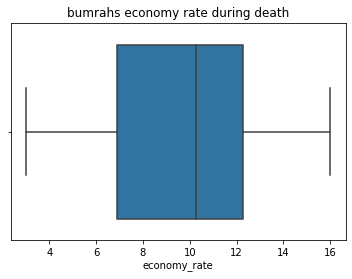

In [135]:
plt.title("bumrahs economy rate during death")
sns.boxplot(bumrah_death_econrate['economy_rate'])
plt.show()

In [139]:
# also checking how many matches bumrah played
print("number of matches where Bumrah bowled")
srh_rcb_all[srh_rcb_all.bowler=='JJ Bumrah'].match_id.unique().shape

number of matches where Bumrah bowled


(11,)

In [140]:
# also checking how many matches bumrah played in death
print("number of matches where Bumrah bowled in death overs")
srh_rcb_deathovers[srh_rcb_deathovers.bowler=='JJ Bumrah'].match_id.unique().shape

number of matches where Bumrah bowled in death overs


(10,)

**Inference:**
    If we check for srh&rcb matches Bumrah out 11 batches bowled death overs in 10. so high chance he will bowl death also on average econmy rate of bumrah during death seems to be more than 10.